In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime as dt
from collections import defaultdict

In [2]:
df = pd.read_json('message.json', orient='records')

df.columns

Index([u'audio_files', u'content', u'gifs', u'photos', u'reactions',
       u'sender_name', u'sticker', u'timestamp', u'type', u'videos'],
      dtype='object')

In [3]:
first_number = re.compile(r"^[1-9][0-9]*")
def get_first_number(content):
    val = 0
    if type(content) != float:
        matches = first_number.match(content)
        if matches is not None:
            val = int(matches.group(0))
    
    if val > 1250:
        val = 0
    return val

df["count"] = df["content"].apply(get_first_number)

In [4]:
def is_announcement(content):
    announcement_strings = [
        ["added"],
        ["removed", "from the group."],
        ['left the group'],
        ['set the nickname for'],
        ['set his own nickname to'],
        ['set your nickname to'],
        ['set her own nickname to'],
        ['cleared', 'nickname']
    ]
    if type(content) == float:
        return False
    return any([all([i in content for i in s]) for s in announcement_strings])

In [5]:
df["announcement"] = df["content"].apply(is_announcement)

errors = df[(df["count"] == 0) & (~(df["announcement"]))]
len(errors)

1307

In [6]:
errors["content"]

50                                                 Dewgong
95                 The number made famous by Douglas Adams
111                                             Twenty six
129                                                   ð±
139                                 Thatâs a fuckin kick
146                                                    Smh
160                                The angle pi in degrees
189                                  Mew's PokÃ©dex number
190                             [Mewtwo's PokÃ©dex number]
241                                                   ð¯
334                                                   ð±
374                                                   ð¯
464                                                 eleven
518                                                  Sorry
521                                      You fucking moron
581                                                   ð±
592                                                     

19174
18770


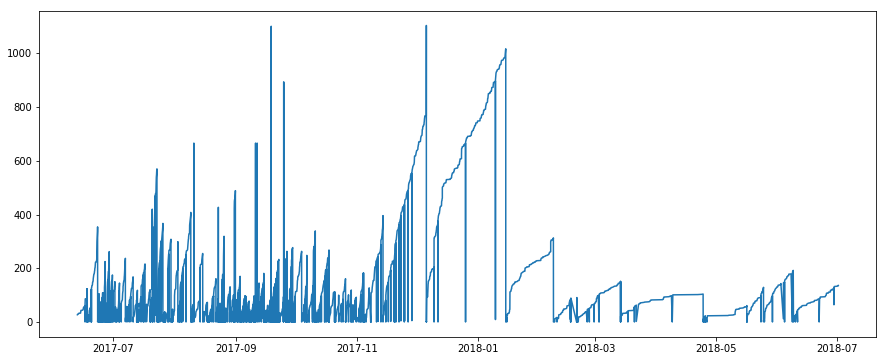

In [7]:
def get_range(df, start, end):
    return df[(df["timestamp"] > start) & (df["timestamp"] < end)]

times = get_range(df, pd.Timestamp(2017, 1, 1), pd.Timestamp(2019, 1, 1))
print len(times)
times = times[times["announcement"] == False]
print len(times)
plt.plot(times["timestamp"], times["count"])
plt.gcf().set_size_inches(15, 6)
plt.show()

In [8]:
# take the counts item.
common_words = defaultdict(int)
for entry in df["content"]:
    if type(entry) != float:
        for word in entry.split(" "):
            common_words[word] += 1

In [9]:
words = [k for k in common_words]
words.sort(key=lambda x : -common_words[x])
[(word, common_words[word]) for word in words]

[(u'the', 744),
 (u'to', 528),
 (u'1', 495),
 (u'2', 327),
 (u'you', 316),
 (u'\xf0\x9f\x8e\xb1', 310),
 (u'a', 293),
 (u'', 288),
 (u'3', 283),
 (u'for', 259),
 (u'I', 252),
 (u'4', 240),
 (u'5', 235),
 (u'of', 229),
 (u'nickname', 214),
 (u'6', 212),
 (u'set', 212),
 (u'is', 207),
 (u'7', 205),
 (u'it', 197),
 (u'that', 192),
 (u'9', 185),
 (u'pratyush', 184),
 (u'and', 182),
 (u'8', 177),
 (u'10', 172),
 (u'11', 170),
 (u'tier)', 170),
 (u'i', 169),
 (u'this', 165),
 (u'in', 160),
 (u'12', 158),
 (u'13', 155),
 (u'14', 149),
 (u'15', 148),
 (u'17', 139),
 (u'me', 138),
 (u'20', 134),
 (u'19', 133),
 (u'18', 133),
 (u'we', 129),
 (u'16', 129),
 (u'22', 128),
 (u'+', 123),
 (u'21', 122),
 (u'23', 122),
 (u'26', 119),
 (u'24', 117),
 (u'number', 116),
 (u'27', 114),
 (u'29', 114),
 (u'30', 114),
 (u'25', 113),
 (u'28', 112),
 (u'31', 111),
 (u'33', 109),
 (u'was', 108),
 (u'fuck', 107),
 (u'34', 106),
 (u'38', 105),
 (u'my', 105),
 (u'39', 103),
 (u'36', 103),
 (u'35', 103),
 (u'32', 1

In [10]:
# ok, so it appears like a good metric to use would be to
# project out like five steps and see if something matches.

df_na = df[df["announcement"] == False]

ahead = 5
behind = 3
vals = []

for i in range(behind, len(df_na) - ahead):
    
    votes = defaultdict(int)
    for j in range(-behind, ahead):
        votes[df_na.iloc[i+j]["count"] + j] += 1
    
    best_result = max(votes, key=votes.get)
    if votes[best_result] < 3:
        best_result = 0
        
    #if best_result > 1000:
    #    print votes, i
    vals.append(best_result)

In [11]:
times = [df_na.iloc[i]["timestamp"] for i in range(behind, len(df_na) - ahead)]

In [12]:
df_smoothed = pd.DataFrame({
    'count': vals,
    'timestamp': times,
})

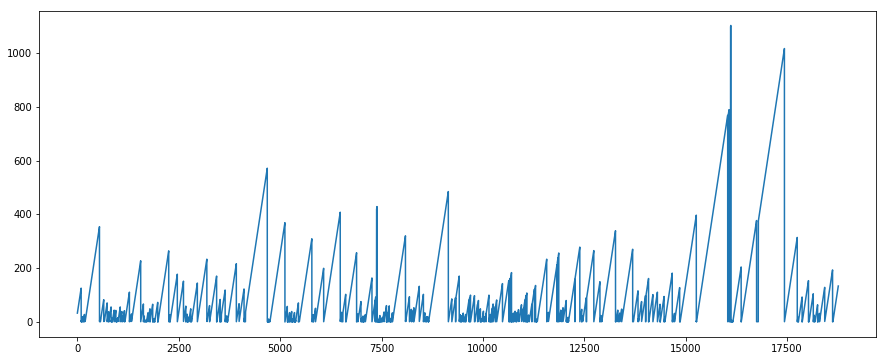

In [13]:
begin = pd.Timestamp(2017, 12, 11, 21, 4)
end = pd.Timestamp(2017, 12, 11, 21, 9)

df_cut = df_smoothed[
    (begin < df_smoothed["timestamp"]) 
    & (df_smoothed["timestamp"] < end)
]

plt.plot(len(df_smoothed) - df_smoothed.index, df_smoothed["count"])
plt.gcf().set_size_inches(15, 6)
plt.show()

In [14]:
df[(begin < df["timestamp"]) & (df["timestamp"] < end)]

,audio_files,content,gifs,photos,reactions,sender_name,sticker,timestamp,type,videos,count,announcement
2027,NaN,378 god bless @Sean King,NaN,NaN,NaN,Justin Kuang,NaN,2017-12-11 21:07:20,Generic,NaN,378,False
2028,NaN,377 it checks out,NaN,NaN,NaN,Matt Habel,NaN,2017-12-11 21:07:07,Generic,NaN,377,False
2029,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:06:19,Generic,NaN,0,False
2030,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:48,Generic,NaN,0,False
2031,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:46,Generic,NaN,0,False
2032,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:45,Generic,NaN,0,False
2033,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:43,Generic,NaN,0,False
2034,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:42,Generic,NaN,0,False
2035,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:39,Generic,NaN,0,False
2036,NaN,ð±,NaN,NaN,NaN,Sean King,NaN,2017-12-11 21:05:38,Generic,NaN,0,False


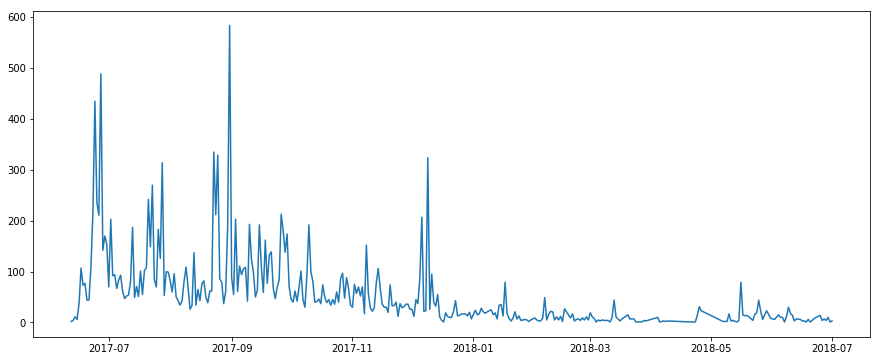

In [15]:
msgs_per_day = df_na[['timestamp',]].groupby(df_na['timestamp'].dt.normalize()).count()
plt.plot(msgs_per_day)
plt.gcf().set_size_inches(15, 6)
plt.show()

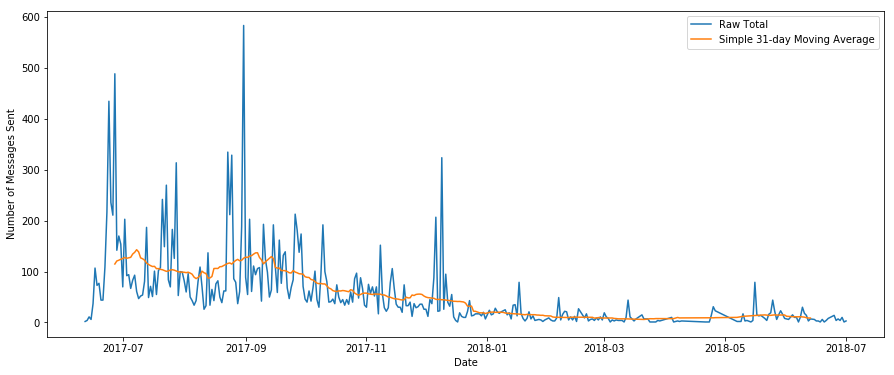

In [16]:
def smoothed_average(x, N):
    assert(N % 2 == 1) #window should be odd.
    side = (N - 1)/2
    msg_per_day_array = np.array(x)
    cumsum = np.cumsum(np.insert(msg_per_day_array, 0, 0)) 
    trimmed_some = (cumsum[N:] - cumsum[:-N]) / float(N)
    front = np.insert(trimmed_some, [0] * side, [float('nan')] * side)
    good = np.append(front, [float('nan')] * side)
    return good

msgs_per_day["smoothed"] = smoothed_average(msgs_per_day["timestamp"], 31)

plt.plot(msgs_per_day["timestamp"])
plt.plot(msgs_per_day["smoothed"])
plt.xlabel("Date")
plt.ylabel("Number of Messages Sent")
plt.legend(["Raw Total", "Simple 31-day Moving Average"])
plt.gcf().set_size_inches(15, 6)
plt.show()

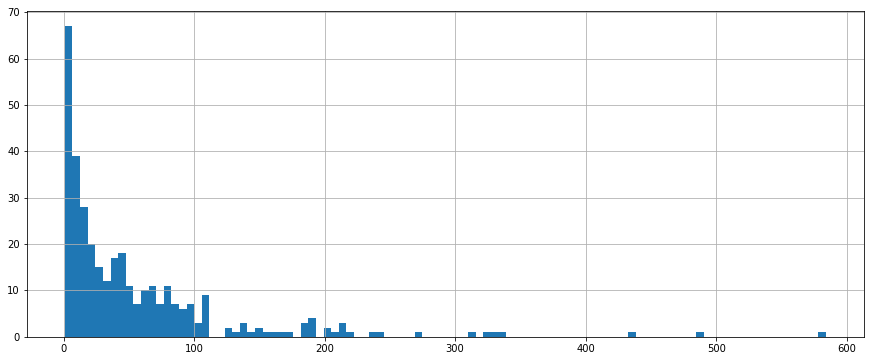

In [17]:
msgs_per_day["timestamp"].hist(bins=100)
plt.gcf().set_size_inches(15, 6)
plt.show()